In [21]:
# Import libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import matplotlib.pylab as pylab
import matplotlib.ticker as mtick
from scipy.ndimage.filters import gaussian_filter1d

params = {'axes.titlesize':'medium'}
pylab.rcParams.update(params)

<ipython-input-22-43107c63efb0>:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(val) for val in ax.get_yticks()])
<ipython-input-22-43107c63efb0>:112: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_legend.add_patch(patches.Polygon(points, closed=True, fill=True, edgecolor='white', alpha=0.3, color='#222222'))


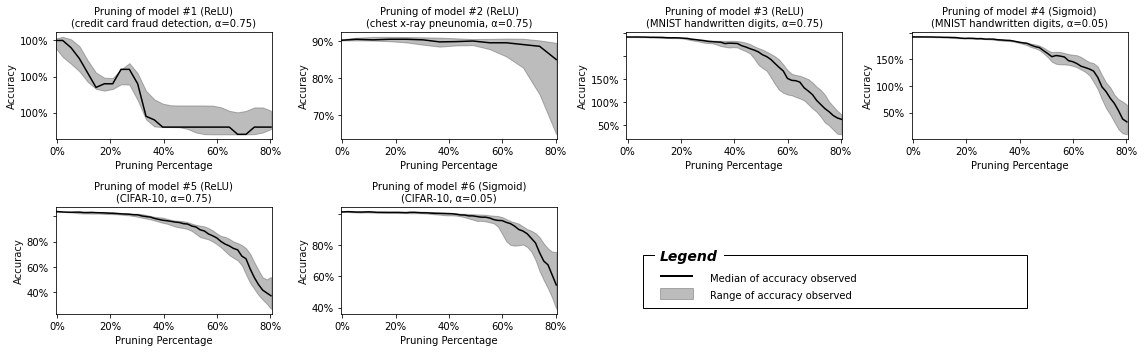

In [22]:
option_list = ['kaggle', 'chest', 'mnist-relu', 'mnist-sigmoid', 'cifar-10-relu', 'cifar-10-sigmoid'] 

def plot_accuracy_decay_subplot(filename, labels, ax):
    data = np.genfromtxt(filename, delimiter=",", names=labels, skip_header=True)

    percentage = data[labels[0]]/100-0.01
    lowests = data[labels[1]]
    highests = data[labels[2]]
    medians = data[labels[3]]

    # For cifar-10 models, add Top K assessment
    lowests_top_k = []
    highests_top_k = []
    medians_top_k = []

    lns = []
    x = np.linspace(0, 1, len(percentage))

    #color = 'tab:red'
    color = '#0f0f0f'
    #ax.set_xticklabels(percentage)
    ax.set_xlabel('Pruning Percentage')

    # color = 'tab:blue'
    if 'chest' in filename:
        ax.set_ylabel('Accuracy', color=color,
                        labelpad=3)  # we already handled the x-label with ax1
        # Set y limit
        # ax.set_ylim([384, 392])
    else:
        ax.set_ylabel('Accuracy', color=color,
                        labelpad=3)  # we already handled the x-label with ax1
        # Set y limit
    ax.set_xlim([-0.00, 0.805])
    
    lowest_smooth = gaussian_filter1d(lowests, sigma=0.8)
    highst_smooth = gaussian_filter1d(highests, sigma=0.8)   lns += ax.plot(percentage, lowest_smooth, color='white', alpha=0, l.05inlinewidth=0, estyle='-')
    lns += ax.plot(percentage, highst_smooth, color='white', alpha=0, l.05, linewidth=0,nestyle='-')
    ax.fill_between(percentage, lowest_smooth, highst_smooth, alpha=0.3, color='#222222')

    lns += ax.plot(percentage, medians, color='black', linestyle='-',label="Accuracy median")
    
    # manipulate
    
    # fixing yticks with matplotlib.ticker "FixedLocator"
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(['{:,.0%}'.format(val) for val in ax.get_xticks()])
    ax.set_xlim([-0.005, 0.805])

    labs = [l.get_label() for l in lns]
    if "cifar_10" in filename:
        legend = ax.legend(lns, labs, bbox_to_anchor=(0, 0.2), loc=3)
        legend.get_frame().set_facecolor('#EEEEEE')
    #else:
    #    legend = ax.legend(lns, labs, loc=3)
    #    legend.get_frame().set_facecolor('#EEEEEE')

# Create a white layout
gridsize = (2, 4)
fig = plt.figure(figsize=(16, 5))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=1)
ax4 = plt.subplot2grid(gridsize, (0, 3), colspan=1, rowspan=1)
ax5 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)
ax6 = plt.subplot2grid(gridsize, (1, 1), colspan=1, rowspan=1)
ax_legend = plt.subplot2grid(gridsize, (1, 2), colspan=2, rowspan=1)

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

ax1.title.set_text('Pruning of model #1 (ReLU)\n(credit card fraud detection, \u03B1=0.75)')
ax2.title.set_text('Pruning of model #2 (ReLU)\n(chest x-ray pneunomia, \u03B1=0.75)')
ax3.title.set_text('Pruning of model #3 (ReLU)\n(MNIST handwritten digits, \u03B1=0.75)')
ax4.title.set_text('Pruning of model #4 (Sigmoid)\n(MNIST handwritten digits, \u03B1=0.05)')
ax5.title.set_text('Pruning of model #5 (ReLU)\n(CIFAR-10, \u03B1=0.75)')
ax6.title.set_text('Pruning of model #6 (Sigmoid)\n(CIFAR-10, \u03B1=0.05)')

fig.tight_layout(pad=5.0, w_pad=9.0, h_pad=5.0)  # otherwise the right y-label is slightly clipped


# Read from csv file
plot_accuracy_decay_subplot("logs/stat/"+option_list[0]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax1)
plot_accuracy_decay_subplot("logs/stat/"+option_list[1]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax2)
plot_accuracy_decay_subplot("logs/stat/"+option_list[2]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax3)
plot_accuracy_decay_subplot("logs/stat/"+option_list[3]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax4)
plot_accuracy_decay_subplot("logs/stat/"+option_list[4]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax5)
plot_accuracy_decay_subplot("logs/stat/"+option_list[5]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax6)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_yticklabels(['{:,.0%}'.format(val) for val in ax.get_yticks()])

# Create a Rectangle patch
ax_legend.set_xlim([0,30])
ax_legend.set_ylim([0,10])
ax_legend.text(2, 5, 'Legend', style='italic', fontsize=14, fontweight='bold',
        bbox={'facecolor': 'white', 'edgecolor': 'white', 'alpha': 1, 'pad': 5})
ax_legend.text(5, 3, 'Median of accuracy observed')
ax_legend.text(5, 1.5, 'Range of accuracy observed')

points = [[1, 0.5], [24, 0.5], [24, 5.5], [1, 5.5]]
line = ax_legend.add_patch(patches.Polygon(points, closed=True, fill=None, edgecolor='black'))

# For accuracy median
points = [[2, 3.5], [4, 3.5]]
ax_legend.add_patch(patches.Polygon(points, closed=None, fill=None, linewidth='2', edgecolor='black'))
# For accuracy range
points = [[2, 1.4], [4, 1.4], [4, 2.4], [2, 2.4]]
ax_legend.add_patch(patches.Polygon(points, closed=True, fill=True, edgecolor='white', alpha=0.3, color='#222222'))
ax_legend.axis("off")

plt.tight_layout()

figure_filename = "save_figs/accuracy_decay.pdf"
if os.path.exists(figure_filename):
  os.remove(figure_filename)

plt.savefig(figure_filename)

plt.show()
